<a href="https://colab.research.google.com/github/tkasod2/TIL/blob/main/prj_analysis/%EC%8B%A4%EC%A0%84_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_9_%EC%9D%B4%ED%83%88_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DRIVE_PATH = "/content/drive/MyDrive/"
DATA_DIR_PATH = "[바로-써먹는-데이터-분석]-강의자료-new4/2부/Part 5. 우리 서비스의 유저들은 언제-왜 떠나요_ - 고객 이탈 분석/실전 프로젝트 9. 이탈 예측하기/"



# 데이터 살펴보기

In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split

In [5]:
# 데이터 불러오기
DATA_FILENAME = "WA_Fn-UseC_-Telco-Customer-Churn.csv" # 디렉토리 내 데이터 파일의 이름
data_path = Path(DRIVE_PATH, DATA_DIR_PATH, DATA_FILENAME)
df = pd.read_csv(data_path)

In [6]:
# 데이터 살펴보기
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
# 컬럼 개수
len(df.columns)

21

In [8]:
# 데이터 개수
len(df)

7043

In [9]:
# TotalCharges 컬럼
# 문자열 데이터로 되어 있음
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [10]:
df['TotalCharges'][0]

'29.85'

In [11]:
# TotalCharges 컬럼 전처리
# 문자열 데이터를 숫자로 변경.
# 빈 값인 경우 NaN이 된다
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [12]:
# 결측치 검사
df.isnull().sum(axis='index')

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# 결측치 제거
df.dropna(inplace = True)

In [15]:
# 고객ID 컬럼 제거
df.drop('customerID', axis='columns', inplace=True)
# 다른 방법: df.drop(columns='customerID', inplace=True)

In [16]:
# Churn 컬럼을 숫자로 바꾸기
df.replace({'Churn': {'Yes': 1, 'No': 0}}, inplace=True)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [18]:
# 카테고리(범주형) 변수를 더미 데이터로 바꾸기
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [45]:
# df_dummies.corr()['Churn'].sort_values(ascending = False).reset_index()

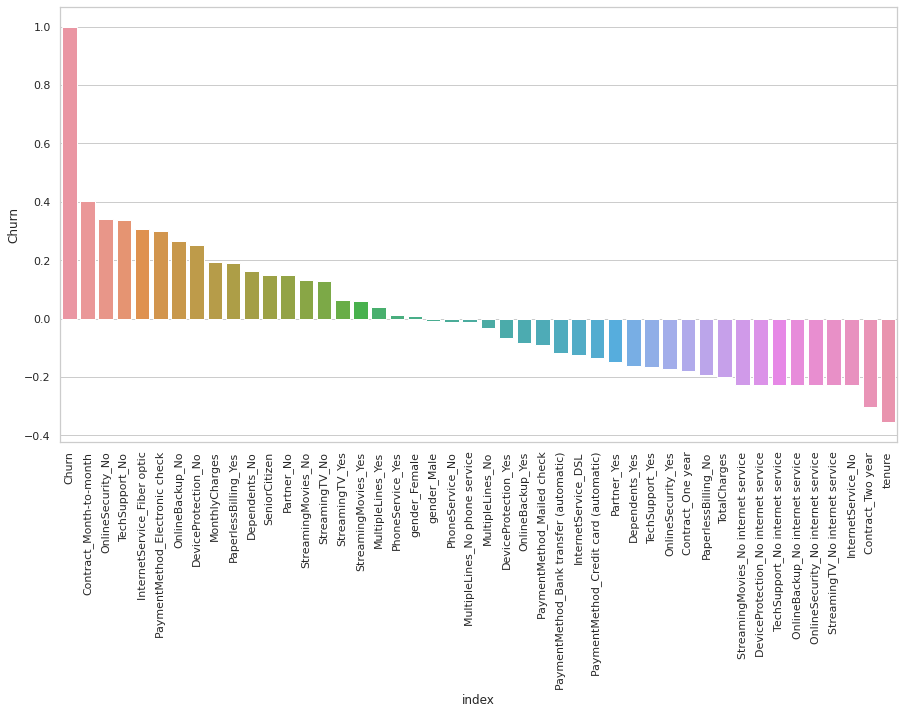

In [42]:
# 이탈과 feature간 관계 확인
sns.set_theme(style = 'whitegrid', palette='pastel')

# plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

g = sns.barplot(x= 'index',y ='Churn', data=df_dummies.corr()['Churn'].sort_values(ascending = False).reset_index())
g.figure.set_size_inches(15, 8)

## Churn과 Churn은 당연히 완전한 선형관계로 1의 값
## Month-to-month 계약은 매달 계약하는 형태이므로, 나가는 확률이 높음
## 성별로 인한 특이사항은 따로 없어 보임
## Tenure는 유지 기간과 관계 있음. 따라서, 음의 상관관계를 띔

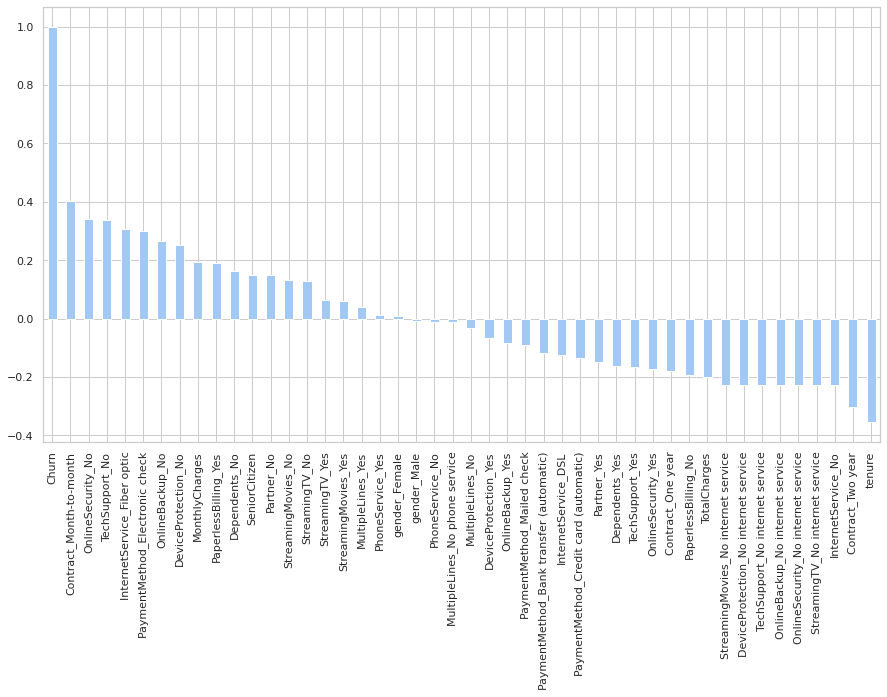

In [32]:
# 각 변수 별 이탈과 관계 보기
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

In [33]:
# Churn 비율 살펴보기
df['Churn'].value_counts(normalize=True).rename('proportion').reset_index().rename(columns={'index': 'Churn'})

,Churn,proportion
0,0,0.734215
1,1,0.265785


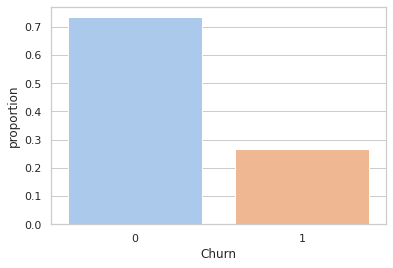

In [34]:
sns.barplot(x='Churn', y='proportion', data=df['Churn'].value_counts(normalize=True).rename('proportion').reset_index().rename(columns={'index': 'Churn'}));

In [36]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


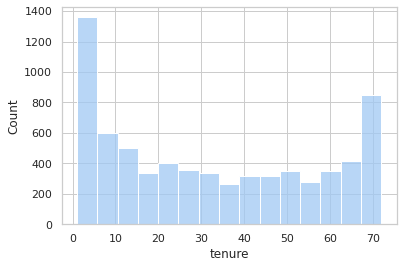

In [35]:
# 고객 유지 기간 살펴보기
sns.histplot(x='tenure', data=df);

In [43]:
# 계약 종류 별 이탈률 살펴보기
df.groupby('Contract')['Churn'].value_counts(normalize=True).rename('proportion').reset_index()

,Contract,Churn,proportion
0,Month-to-month,0,0.572903
1,Month-to-month,1,0.427097
2,One year,0,0.887228
3,One year,1,0.112772
4,Two year,0,0.971513
5,Two year,1,0.028487


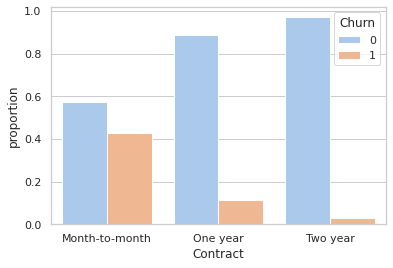

In [44]:
sns.barplot(x='Contract', y='proportion', hue='Churn', data=df.groupby('Contract')['Churn'].value_counts(normalize=True).rename('proportion').reset_index())

# month to month 계약의 경우 이탈률이 상대적으로 높음

In [46]:
# 학습/테스트 데이터셋 나누기
train_df, test_df = train_test_split(df_dummies, random_state=0)
train_X = train_df.drop(columns='Churn')
train_y = train_df['Churn'].values
test_X = test_df.drop(columns='Churn')
test_y = test_df['Churn'].values

In [49]:
len(train_X)

5274

In [50]:
len(test_X)

1758

# 트리 모델로 이탈 예측하기

In [51]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [52]:
# 모델 초기화 및 학습하기
model = DecisionTreeClassifier(random_state=0, max_depth=5, )
model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [53]:
# 모델 평가하기 (정확도)
from sklearn import metrics
prediction_test = model.predict(test_X)
print(metrics.accuracy_score(test_y, prediction_test))

0.7969283276450512


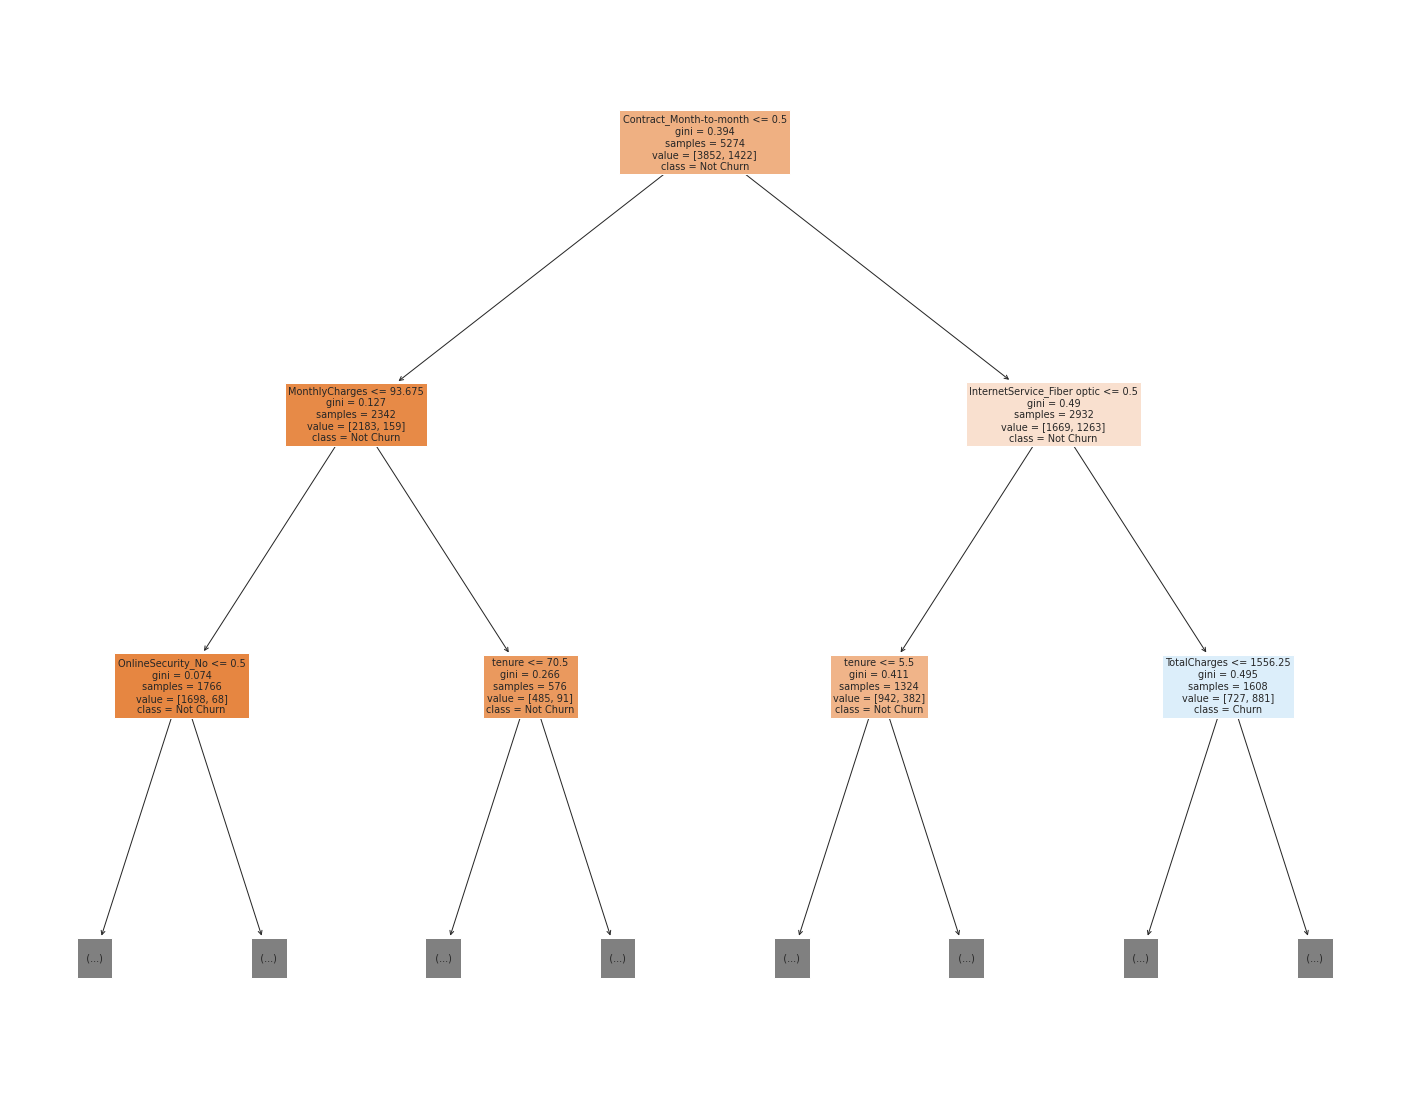

In [54]:
# 의사 결정 나무 시각화하기
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, 
                   feature_names=train_X.columns,  
                   class_names=['Not Churn', 'Churn'],
                   max_depth=2,
                   filled=True);